In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_style("whitegrid")

# We need to go up one directory ('../') to find the 'data' folder
DATA_PATH = "../data/processed/matches.csv"

# Load the dataset
try:
    df = pd.read_csv(DATA_PATH, parse_dates=['match_date'])
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: Could not find data file at {DATA_PATH}")

df.head()

Data loaded successfully!


,match_id,match_date,home_team,away_team,home_score,away_score,home_xg,away_xg,home_passes,away_passes,home_possession,away_possession
0,15946,2025-11-05,Barcelona,Deportivo Alavés,3,0,2.659924,0.292110,917,246,0.749588,0.250412
1,3825769,2025-11-05,Villarreal,Málaga,1,0,0.794833,0.417998,509,501,0.514613,0.485387
2,3825768,2025-11-05,Sporting Gijón,Rayo Vallecano,2,2,1.725248,1.512055,369,599,0.401241,0.598759
3,3825767,2025-11-05,Espanyol,Real Sociedad,0,5,0.315561,1.656451,613,355,0.594721,0.405279
4,3825766,2025-11-05,Real Betis,Valencia,1,0,1.031898,1.020860,375,470,0.458948,0.541052


In [2]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   match_id         552 non-null    int64         
 1   match_date       552 non-null    datetime64[ns]
 2   home_team        552 non-null    object        
 3   away_team        552 non-null    object        
 4   home_score       552 non-null    int64         
 5   away_score       552 non-null    int64         
 6   home_xg          552 non-null    float64       
 7   away_xg          552 non-null    float64       
 8   home_passes      552 non-null    int64         
 9   away_passes      552 non-null    int64         
 10  home_possession  552 non-null    float64       
 11  away_possession  552 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 51.9+ KB


In [4]:
# Get descriptive statistics for all numerical columns
df.describe()

,match_id,match_date,home_score,away_score,home_xg,away_xg,home_passes,away_passes,home_possession,away_possession
count,5.520000e+02,552,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,2.696337e+06,2025-11-05 00:00:00,1.663043,1.204710,1.523491,1.161488,516.697464,486.239130,0.513176,0.486824
min,9.575000e+03,2025-11-05 00:00:00,0.000000,0.000000,0.085537,0.000000,198.000000,209.000000,-0.274355,0.225524
25%,3.033942e+05,2025-11-05 00:00:00,1.000000,0.000000,0.845999,0.609082,406.750000,388.000000,0.445004,0.416110
50%,3.825632e+06,2025-11-05 00:00:00,1.000000,1.000000,1.347747,1.001990,498.500000,466.500000,0.519402,0.480598
75%,3.825770e+06,2025-11-05 00:00:00,2.000000,2.000000,2.015568,1.520886,611.250000,577.000000,0.583890,0.554996
max,3.825908e+06,2025-11-05 00:00:00,10.000000,8.000000,6.151456,4.034037,1028.000000,1035.000000,0.774476,1.274355
std,1.688910e+06,NaN,1.490031,1.215349,0.941227,0.745023,145.592715,140.568604,0.106433,0.106433


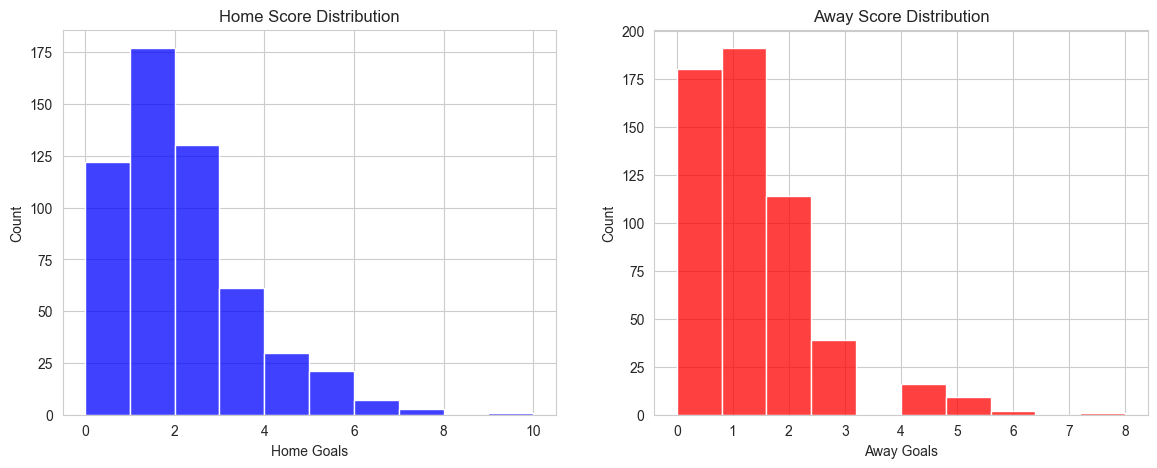

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['home_score'], bins=10, ax=ax[0], kde=False, color='blue')
ax[0].set_title('Home Score Distribution')
ax[0].set_xlabel('Home Goals')

sns.histplot(df['away_score'], bins=10, ax=ax[1], kde=False, color='red')
ax[1].set_title('Away Score Distribution')
ax[1].set_xlabel('Away Goals')

plt.show()

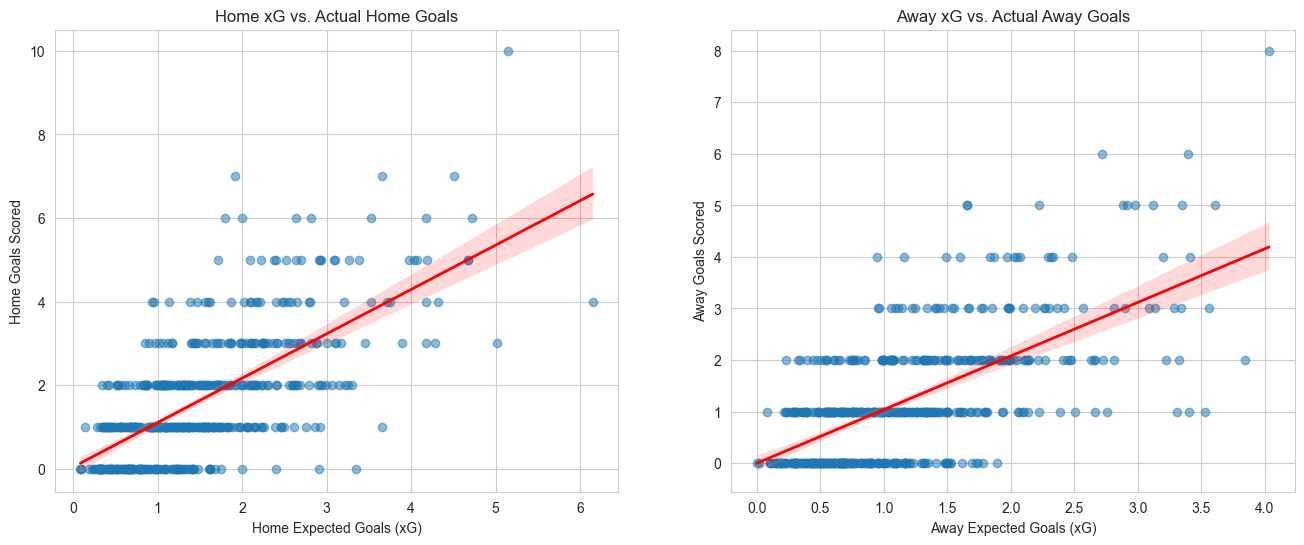

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Home xG vs. Home Score
sns.regplot(data=df, x='home_xg', y='home_score', ax=ax[0], 
            line_kws={"color": "red", "lw": 2}, 
            scatter_kws={"alpha": 0.5})
ax[0].set_title('Home xG vs. Actual Home Goals')
ax[0].set_xlabel('Home Expected Goals (xG)')
ax[0].set_ylabel('Home Goals Scored')

# Plot Away xG vs. Away Score
sns.regplot(data=df, x='away_xg', y='away_score', ax=ax[1], 
            line_kws={"color": "red", "lw": 2}, 
            scatter_kws={"alpha": 0.5})
ax[1].set_title('Away xG vs. Actual Away Goals')
ax[1].set_xlabel('Away Expected Goals (xG)')
ax[1].set_ylabel('Away Goals Scored')

plt.show()

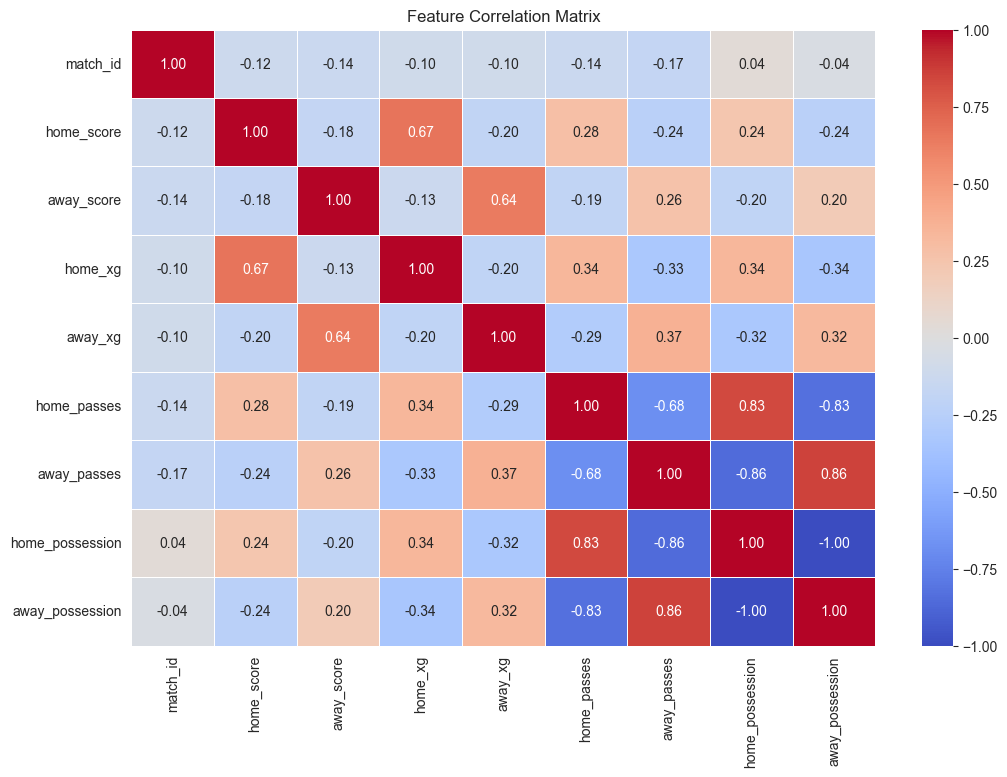

In [7]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()